# 实现简单线性回归
![](images/01.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

[0, 6, 0, 6]

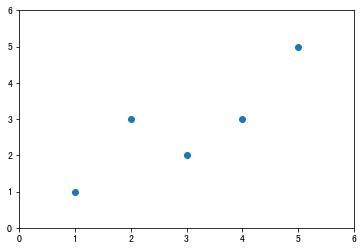

In [3]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])

## 手动计算w、b

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [5]:
num = 0.0
d = 0.0
for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [6]:
a = num/d

In [7]:
b = y_mean - a * x_mean

In [8]:
y_hat = a * x + b

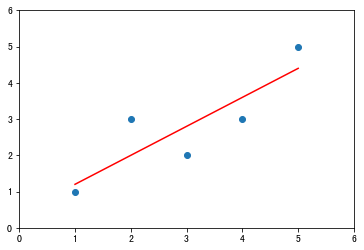

In [9]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.axis([0, 6, 0, 6]) # plt.xlim(-6, 6)
plt.show()

In [10]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.2

### 封装自己的SimpleLinearRegression

代码参见 [这里](playML/SimpleLinearRegression.py)

In [11]:
from playML.SimpleLinearRegression import SimpleLinearRegression1

reg1 = SimpleLinearRegression1()
reg1.fit(x, y)
reg1.predict(np.array([x_predict]))

array([5.2])

In [12]:
reg1.a_

0.8

In [13]:
reg1.b_

0.39999999999999947

In [14]:
y_hat1 = reg1.predict(x)

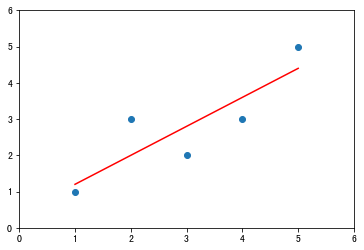

In [15]:
plt.scatter(x, y)
plt.plot(x, y_hat1, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

## `向量化`实现SimpleLinearRegression

代码参见 [这里](playML/SimpleLinearRegression.py)

In [16]:
from playML.SimpleLinearRegression import SimpleLinearRegression2

reg2 = SimpleLinearRegression2()
reg2.fit(x, y)
reg2.predict(np.array([x_predict]))

array([5.2])

In [17]:
reg2.a_

0.8

## 向量化实现的性能测试

In [18]:
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2 + 3 + np.random.normal(size=m)
%timeit reg1.fit(big_x, big_y)
%timeit reg2.fit(big_x, big_y)

941 ms ± 33.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.27 ms ± 533 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
reg1.a_

2.0026583897283943

In [20]:
reg1.b_

2.9977655417706943

In [21]:
reg2.a_

2.0026583897285

In [22]:
reg2.b_

2.9977655417706415